In [382]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats.distributions import chi2
import statsmodels.tsa.stattools as sts
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARMA
import pylab
import matplotlib.pyplot as plt

In [383]:
raw_csv_data = pd.read_csv('Data/original.csv')

In [384]:
df_comp = raw_csv_data.copy()

In [385]:
df_comp.shape

(6269, 5)

In [386]:
df_comp.head()
# 15 Sep 2008 Lehman crash

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


In [387]:
df_comp.describe()

,spx,dax,ftse,nikkei
count,6269.000000,6269.000000,6269.000000,6269.000000
mean,1288.127542,6080.063363,5422.713545,14597.055700
std,487.586473,2754.361032,1145.572428,4043.122953
min,438.920000,1911.700000,2876.600000,7054.980000
25%,990.671905,4069.350000,4486.100000,10709.290000
50%,1233.420000,5773.340000,5662.430000,15028.170000
75%,1459.987747,7443.070000,6304.250000,17860.470000
max,2872.867839,13559.600000,7778.637689,24124.150000


In [388]:
df_comp.isna().sum()

date      0
spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

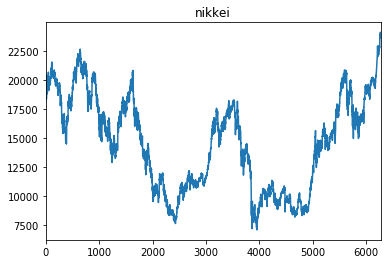

In [389]:
df_comp.nikkei.plot(title="nikkei")

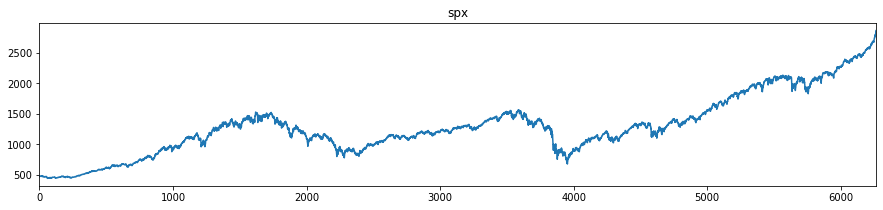

In [390]:
df_comp.spx.plot(title="spx", figsize=(15,3))

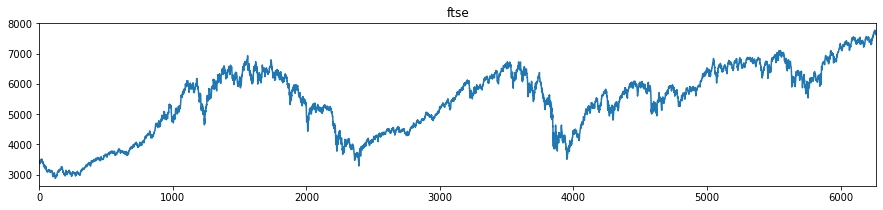

In [391]:
df_comp.ftse.plot(title="ftse", figsize=(15,3))

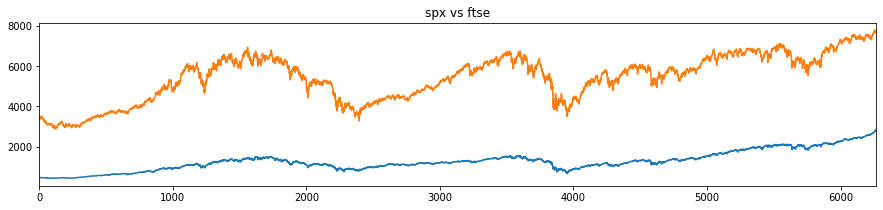

In [392]:
df_comp.spx.plot(title="spx", figsize=(15,3))
df_comp.ftse.plot(title="ftse", figsize=(15,3))
plt.title('spx vs ftse')
plt.show()

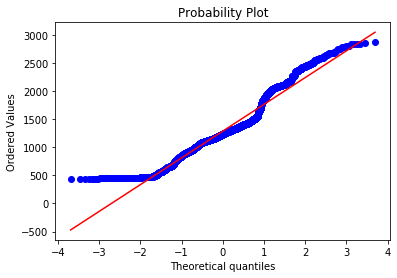

In [393]:
stats.probplot(df_comp.spx, plot=pylab)
pylab.show()

## From Text to date

In [394]:
df_comp.date.describe()

count           6269
unique          6269
top       16/10/2003
freq               1
Name: date, dtype: object

In [395]:
pd.to_datetime(df_comp.date, dayfirst= True)

0      1994-01-07
1      1994-01-10
2      1994-01-11
3      1994-01-12
4      1994-01-13
          ...    
6264   2018-01-23
6265   2018-01-24
6266   2018-01-25
6267   2018-01-26
6268   2018-01-29
Name: date, Length: 6269, dtype: datetime64[ns]

In [396]:
df_comp.date = pd.to_datetime(df_comp.date, dayfirst=True)

In [397]:
df_comp.head()

,date,spx,dax,ftse,nikkei
0,1994-01-07,469.90,2224.95,3445.98,18124.01
1,1994-01-10,475.27,2225.00,3440.58,18443.44
2,1994-01-11,474.13,2228.10,3413.77,18485.25
3,1994-01-12,474.17,2182.06,3372.02,18793.88
4,1994-01-13,472.47,2142.37,3360.01,18577.26


In [398]:
df_comp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6269 entries, 0 to 6268
Data columns (total 5 columns):
date      6269 non-null datetime64[ns]
spx       6269 non-null float64
dax       6269 non-null float64
ftse      6269 non-null float64
nikkei    6269 non-null float64
dtypes: datetime64[ns](1), float64(4)
memory usage: 245.0 KB


In [399]:
df_comp.date.describe()

count                    6269
unique                   6269
top       1999-08-23 00:00:00
freq                        1
first     1994-01-07 00:00:00
last      2018-01-29 00:00:00
Name: date, dtype: object

In [400]:
df_comp.set_index(df_comp.date, inplace=True)

In [401]:
df_comp.head()

,date,spx,dax,ftse,nikkei
date,,,,,
1994-01-07,1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,1994-01-13,472.47,2142.37,3360.01,18577.26


## Setting the desired frequency

In [402]:
df_comp.asfreq('d')

,date,spx,dax,ftse,nikkei
date,,,,,
1994-01-07,1994-01-07,469.900000,2224.95,3445.980000,18124.01
1994-01-08,NaT,NaN,NaN,NaN,NaN
1994-01-09,NaT,NaN,NaN,NaN,NaN
1994-01-10,1994-01-10,475.270000,2225.00,3440.580000,18443.44
1994-01-11,1994-01-11,474.130000,2228.10,3413.770000,18485.25
...,...,...,...,...,...
2018-01-25,2018-01-25,2839.253031,13298.36,7615.839954,23669.49
2018-01-26,2018-01-26,2872.867839,13340.17,7665.541292,23631.88
2018-01-27,NaT,NaN,NaN,NaN,NaN


In [403]:
# Take only busines day
df_comp.asfreq('b')

,date,spx,dax,ftse,nikkei
date,,,,,
1994-01-07,1994-01-07,469.900000,2224.95,3445.980000,18124.01
1994-01-10,1994-01-10,475.270000,2225.00,3440.580000,18443.44
1994-01-11,1994-01-11,474.130000,2228.10,3413.770000,18485.25
1994-01-12,1994-01-12,474.170000,2182.06,3372.020000,18793.88
1994-01-13,1994-01-13,472.470000,2142.37,3360.010000,18577.26
...,...,...,...,...,...
2018-01-23,2018-01-23,2839.130362,13559.60,7731.827774,24124.15
2018-01-24,2018-01-24,2837.544008,13414.74,7643.428966,23940.78
2018-01-25,2018-01-25,2839.253031,13298.36,7615.839954,23669.49


In [404]:
df_comp = df_comp.asfreq('b')

In [405]:
df_comp.head()

,date,spx,dax,ftse,nikkei
date,,,,,
1994-01-07,1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,1994-01-13,472.47,2142.37,3360.01,18577.26


## Handling Missing Values

In [406]:
df_comp.isna().sum()

date      8
spx       8
dax       8
ftse      8
nikkei    8
dtype: int64

In [407]:
df_comp.spx =df_comp.spx.fillna(method = 'ffill')

In [408]:
df_comp.ftse =df_comp.ftse.fillna(method = 'bfill')

In [409]:
df_comp.dax = df_comp.dax.fillna(value=df_comp.dax.mean())

In [410]:
df_comp.isna().sum()

date      8
spx       0
dax       0
ftse      0
nikkei    8
dtype: int64

In [411]:
#!pip install yfinance

In [412]:
import yfinance

In [414]:
raw_data = yfinance.download(tickers='^GSPC ^FTSE ^N225 ^GDAXI', start="1994-01-07", end="2019-09-27", interval="1d",
                            group_by="ticker", auto_adjust=True, treads=True)

[*********************100%***********************]  4 of 4 completed


In [415]:
raw_data.head()

^GSPC                                                   \
                  Open        High         Low       Close       Volume   
Date                                                                      
1994-01-06  467.549988  469.000000  467.019989  467.119995  365960000.0   
1994-01-07  467.089996  470.260010  467.029999  469.899994  324920000.0   
1994-01-10  469.899994  475.269989  469.549988  475.269989  319490000.0   
1994-01-11  475.269989  475.279999  473.269989  474.130005  305490000.0   
1994-01-12  474.130005  475.059998  472.140015  474.170013  310690000.0   

                 ^GDAXI                                                \
                   Open         High          Low        Close Volume   
Date                                                                    
1994-01-06  2228.090088  2228.489990  2206.459961  2220.629883    0.0   
1994-01-07  2218.959961  2227.639893  2201.820068  2224.949951    0.0   
1994-01-10  2231.840088  2238.010010  2222.000000  2225.000000    0.0   
1994-01-11  2225.429932  2235.610107  2225.179932  2228.100098    0.0   
1994-01-12  2227.120117  2227.790039  2182.060059  2182.060059    0.0   

                   ^N225                                                   \
                    Open          High           Low         Close Volume   
Date                                                                        
1994-01-06           NaN           NaN           NaN           NaN    NaN   
1994-01-07  17842.980469  18131.410156  17787.480469  18124.009766    0.0   
1994-01-10  18186.519531  18567.060547  18186.519531  18443.439453    0.0   
1994-01-11  18481.849609  18671.669922  18373.039062  18485.250000    0.0   
1994-01-12  18447.339844  18807.080078  18301.929688  18793.880859    0.0   

                  ^FTSE                                                
                   Open         High          Low        Close Volume  
Date                                                                   
1994-01-06  3355.300049  3407.699951  3355.300049  3403.000000    0.0  
1994-01-07  3401.399902  3446.800049  3398.699951  3446.000000    0.0  
1994-01-10  3465.699951  3468.100098  3430.000000  3440.600098    0.0  
1994-01-11  3442.500000  3442.500000  3413.500000  3413.800049    0.0  
1994-01-12  3394.800049  3402.399902  3372.000000  3372.000000    0.0

In [416]:
raw_data.shape

(6693, 20)

In [417]:
df_comp = raw_data.copy()

In [418]:
df_comp['spx'] = df_comp["^GSPC"].Close
df_comp['dax'] = df_comp["^GDAXI"].Close
df_comp['ftse'] = df_comp["^FTSE"].Close
df_comp['nikkei'] = df_comp["^N225"].Close

In [419]:
# Remove for the first element
df_comp = df_comp[1:]

In [420]:
df_comp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6692 entries, 1994-01-07 to 2019-09-26
Data columns (total 24 columns):
(^GSPC, Open)       6476 non-null float64
(^GSPC, High)       6476 non-null float64
(^GSPC, Low)        6476 non-null float64
(^GSPC, Close)      6476 non-null float64
(^GSPC, Volume)     6476 non-null float64
(^GDAXI, Open)      6513 non-null float64
(^GDAXI, High)      6513 non-null float64
(^GDAXI, Low)       6513 non-null float64
(^GDAXI, Close)     6513 non-null float64
(^GDAXI, Volume)    6513 non-null float64
(^N225, Open)       6316 non-null float64
(^N225, High)       6316 non-null float64
(^N225, Low)        6316 non-null float64
(^N225, Close)      6316 non-null float64
(^N225, Volume)     6316 non-null float64
(^FTSE, Open)       6499 non-null float64
(^FTSE, High)       6499 non-null float64
(^FTSE, Low)        6499 non-null float64
(^FTSE, Close)      6499 non-null float64
(^FTSE, Volume)     6499 non-null float64
(spx, )             6476 non-null f

In [421]:
# Removing original tickers of the data set
del df_comp["^GSPC"]
del df_comp["^GDAXI"]
del df_comp["^FTSE"]
del df_comp["^N225"]

In [422]:
df_comp.head()

,spx,dax,ftse,nikkei
,,,,
Date,,,,
1994-01-07,469.899994,2224.949951,3446.000000,18124.009766
1994-01-10,475.269989,2225.000000,3440.600098,18443.439453
1994-01-11,474.130005,2228.100098,3413.800049,18485.250000
1994-01-12,474.170013,2182.060059,3372.000000,18793.880859
1994-01-13,472.470001,2142.370117,3360.000000,18577.259766


In [423]:
df_comp = df_comp.asfreq('b')

In [424]:
df_comp = df_comp.fillna(method='ffill')

In [425]:
df_comp.isna().sum()

spx         0
dax         0
ftse        0
nikkei      0
dtype: int64

In [426]:
df_comp.shape

(6710, 4)

In [427]:
df_comp.tail()

,spx,dax,ftse,nikkei
,,,,
Date,,,,
2019-09-20,2992.070068,12468.009766,7344.899902,22079.089844
2019-09-23,2991.780029,12342.330078,7326.100098,22079.089844
2019-09-24,2966.600098,12307.150391,7291.399902,22098.839844
2019-09-25,2984.870117,12234.179688,7290.000000,22020.150391
2019-09-26,2977.620117,12288.540039,7351.100098,22048.240234


In [428]:
size = int(len(df_comp) * 0.8)

In [429]:
df = df_comp[:size]
df_test = df_comp[size:]

In [430]:
df.shape, df_test.shape

((5368, 4), (1342, 4))

## White Noise

In [431]:
raw_csv_data = pd.read_csv('Data/original.csv')

In [432]:
raw_csv_data.head()

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


In [433]:
df_comp = raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst=True)

In [434]:
df_comp.set_index("date", inplace=True, drop=True)

In [435]:
df_comp = df_comp.asfreq('b')

In [436]:
df_comp = df_comp.fillna(method='ffill')

In [437]:
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


In [438]:
df_comp.isna().sum()

spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

In [439]:
df_comp['market_value'] = df_comp['spx']

In [440]:
del df_comp['spx']
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']

In [441]:
size = int(len(df_comp) * 0.8)

In [442]:
df, df_test = df_comp[:size], df_comp[size:]

In [443]:
df.shape, df_test.shape

((5021, 1), (1256, 1))

In [444]:
wn = np.random.normal(loc=df.market_value.mean(), scale=df.market_value.std(), size=len(df))

In [445]:
df['wn'] = wn

C:\Install\anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [446]:
df.describe()

,market_value,wn
count,5021.000000,5021.000000
mean,1091.651926,1086.716891
std,292.559287,296.102161
min,438.920000,64.073667
25%,914.620000,883.069495
50%,1144.650000,1085.490463
75%,1316.280729,1287.286337
max,1570.252238,2158.730298


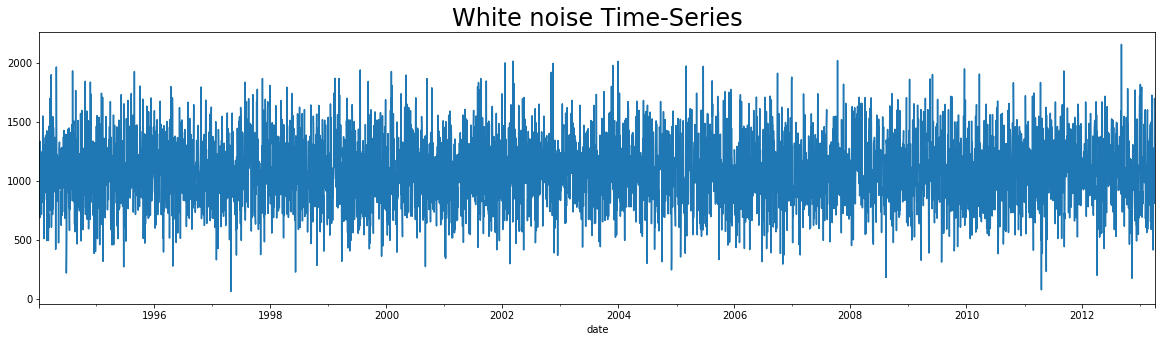

In [447]:
df.wn.plot(figsize=(20,5))
plt.title("White noise Time-Series", size=24)
plt.show()

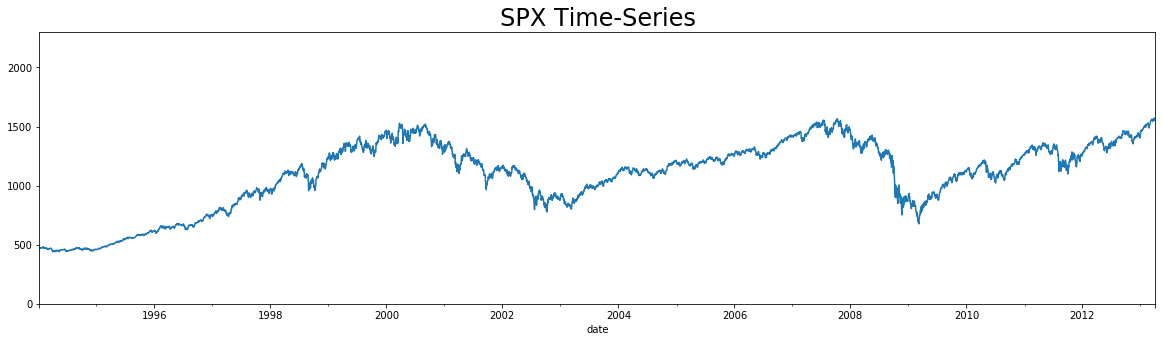

In [448]:
df.market_value.plot(figsize=(20,5))
plt.title("SPX Time-Series", size=24)
plt.ylim(0, 2300)
plt.show()

## Random Walk

In [449]:
raw_data = pd.read_csv('Data/random-walk.csv')

In [450]:
raw_data.head(), raw_data_csv.shape

(         date        price
 0  07/01/1994  1122.139662
 1  08/01/1994  1135.238562
 2  09/01/1994  1109.897831
 3  10/01/1994  1080.347860
 4  11/01/1994  1082.095245, (7029, 2))

In [451]:
raw_data.date = pd.to_datetime(raw_data.date, dayfirst=True)

In [452]:
raw_data.set_index("date", inplace=True)

In [453]:
raw_data.asfreq('b')

,price
date,
1994-01-07,1122.139662
1994-01-10,1080.347860
1994-01-11,1082.095245
1994-01-12,1083.639265
1994-01-13,1067.146255
...,...
2013-04-01,2263.675474
2013-04-02,2225.000870
2013-04-03,2190.787688


In [454]:
raw_data.describe()

,price
count,7029.000000
mean,1269.648367
std,443.999180
min,574.382397
25%,931.488599
50%,1155.773451
75%,1488.957260
max,2715.508720


In [455]:
df['rw'] = raw_data['price']

C:\Install\anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [456]:
df.head()

,market_value,wn,rw
date,,,
1994-01-07,469.90,1119.093789,1122.139662
1994-01-10,475.27,819.938801,1080.347860
1994-01-11,474.13,690.429207,1082.095245
1994-01-12,474.17,1335.927602,1083.639265
1994-01-13,472.47,947.063986,1067.146255


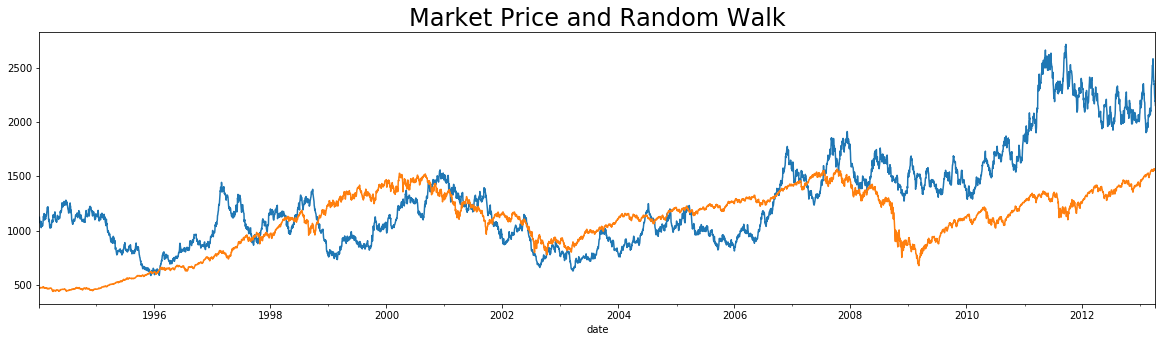

In [457]:
df.rw.plot(figsize=(20,5))
df.market_value.plot(figsize=(20, 5))
plt.title("Market Price and Random Walk", size=24)
plt.show()

## Stationary Test

In [458]:
sts.adfuller(df.market_value)
# test_statistics
# p_value
# lag for Regression
# sample size
# Critical values

# test_stat > critical_Value
# Do Not Reject Null Hypothesis (Non-stationary)
# market_price is Non-stationary

(-1.7369847452352427,
 0.4121645696770626,
 18,
 5002,
 {'1%': -3.431658008603046,
  '5%': -2.862117998412982,
  '10%': -2.567077669247375},
 39904.880607487445)

In [459]:
sts.adfuller(df.wn)
# test_stat < critical_Value
# Reject Null Hypothesis (Non-stationary)
# White Noise is Stationary

(-71.75280911440963,
 0.0,
 0,
 5020,
 {'1%': -3.431653316130827,
  '5%': -2.8621159253018247,
  '10%': -2.5670765656497516},
 70939.51061133244)

In [460]:
sts.adfuller(df.rw)
# test_stat > critical_Value
# Do Not Reject Null Hypothesis (Non-stationary)
# Random Walk is Non-stationary

(-1.3286073927689723,
 0.6159849181617383,
 24,
 4996,
 {'1%': -3.4316595802782865,
  '5%': -2.8621186927706463,
  '10%': -2.567078038881065},
 46299.333497595144)

## Seasonality

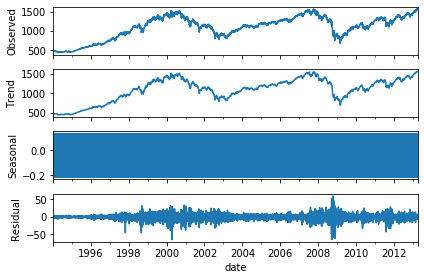

In [461]:
s_decomp_additive = seasonal_decompose(df.market_value, model="additive")
s_decomp_additive.plot()
plt.show()

# Default Trend is value from the previous period

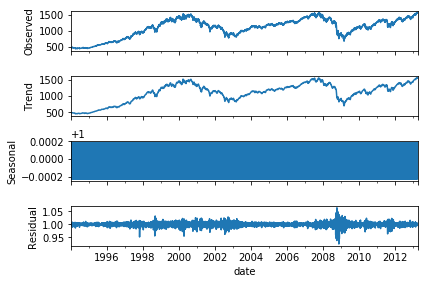

In [462]:
s_decomp_multiplicative = seasonal_decompose(df.market_value, model="multiplicative")
s_decomp_multiplicative.plot()
plt.show()

# Default Trend is value from the previous period

## Auto Correlation Function (ACF)

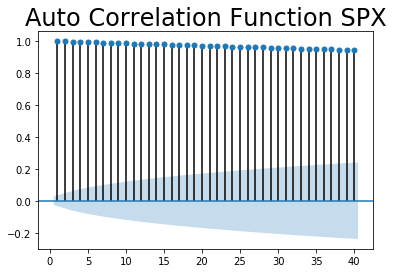

In [463]:
sgt.plot_acf(df.market_value, lags=40, zero=False)
plt.title("Auto Correlation Function SPX", size=24)
plt.show()

# With 40 lags, all values, are between 0.9 and 1
# All coefficients are significant
# The effects barely deteriorate over time
# More lags will better fit the data we feed unto the model
# But that would overfit the model
# Coefficient might predict the data too well

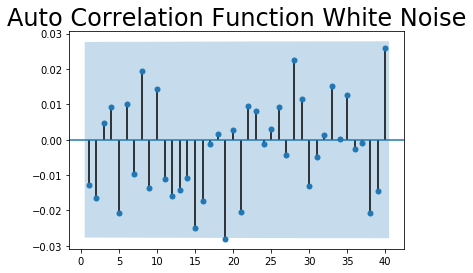

In [464]:
sgt.plot_acf(df.wn, lags=40, zero=False)
plt.title("Auto Correlation Function White Noise", size=24)
plt.show()

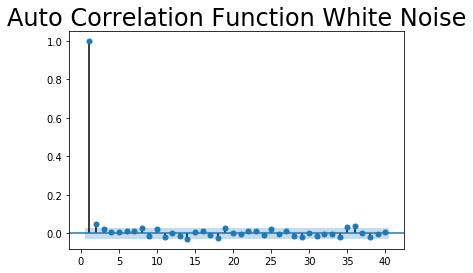

In [465]:
sgt.plot_pacf(df.market_value, lags=40, zero=False)
plt.title("Auto Correlation Function White Noise", size=24)
plt.show()

# Coefficients not between 0.9 and 1
# Coefficients are +ve and -ve
# Coefficients are not-significant
# Coefficients which are close to 0 are not relevant for the model and safe to ignore
# Beyond 22 lags, the coefficients have -ve values (last month)
# This is ideal data where only previous period data have largest contribution
# Include only the last lag in the model

## Fitting AR(1) Model

In [466]:
raw_csv_data = pd.read_csv('Data/original.csv')

In [467]:
df_comp = raw_csv_data.copy()

In [468]:
df_comp.date = pd.to_datetime(df_comp.date, dayfirst=True)

In [469]:
df_comp.set_index('date', inplace=True)

In [470]:
df_comp = df_comp.asfreq('b')

In [471]:
df_comp = df_comp.fillna(method='ffill')

In [472]:
df_comp['market_value'] = df_comp.ftse

In [473]:
del df_comp['spx']
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']

In [474]:
size = int(len(df_comp) * 0.8)

In [645]:
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

In [646]:
df.head()

,market_value
date,
1994-01-07,3445.98
1994-01-10,3440.58
1994-01-11,3413.77
1994-01-12,3372.02
1994-01-13,3360.01


In [647]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5021 entries, 1994-01-07 to 2013-04-05
Freq: B
Data columns (total 1 columns):
market_value    5021 non-null float64
dtypes: float64(1)
memory usage: 78.5 KB


In [710]:
models = []
results = []

In [711]:
model_ar = ARMA(df.market_value, order=(1,0))
# order(p, q): p number of lags and q number of residuals

In [712]:
result_ar = model_ar.fit()

In [713]:
result_ar.summary()

# z: test statistics: how far values away from the true values
# p: p_values: close to zero means coefficients are significant

# p_value greater than 0.05
# Reject Null Hypothesis (coefficient is significantly different than zero)
# Coefficient is not-significantlly different than zero
# Coefficient us equal to zero
# that lag is of no importance for the current price

# We prefer model with log-likelihood value going towards +ve
# We prefer model with lower AIC or BIC value

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5020
Model:                     ARMA(1, 0)   Log Likelihood              -27617.599
Method:                       css-mle   S.D. of innovations             59.264
Date:                Sat, 16 May 2020   AIC                          55241.197
Time:                        12:12:11   BIC                          55260.761
Sample:                    01-10-1994   HQIC                         55248.052
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5078.1957    487.154     10.424      0.000    4123.391    6033.001
ar.L1.market_value     0.9985      0.001   1297.554      0.000       0.997       1.000
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0015           +0.0000j            1.0015            0.0000
-----------------------------------------------------------------------------
"""

In [714]:
models.append(model_ar)
results.append(result_ar)

## Fitting Higher-Lag AR Model

In [715]:
model_ar = ARMA(df.market_value, order=(2, 0))
result_ar = model_ar.fit()
result_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5020
Model:                     ARMA(2, 0)   Log Likelihood              -27616.865
Method:                       css-mle   S.D. of innovations             59.255
Date:                Sat, 16 May 2020   AIC                          55241.731
Time:                        12:12:28   BIC                          55267.815
Sample:                    01-10-1994   HQIC                         55250.871
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5070.8859    495.261     10.239      0.000    4100.192    6041.579
ar.L1.market_value     0.9814      0.014     69.588      0.000       0.954       1.009
ar.L2.market_value     0.0171      0.014      1.210      0.226      -0.011       0.045
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0015           +0.0000j            1.0015            0.0000
AR.2          -58.4791           +0.0000j           58.4791            0.5000
-----------------------------------------------------------------------------
"""

In [716]:
models.append(model_ar)
results.append(result_ar)

In [717]:
model_ar = ARMA(df.market_value, order=(3, 0))
result_ar = model_ar.fit()
result_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5020
Model:                     ARMA(3, 0)   Log Likelihood              -27610.867
Method:                       css-mle   S.D. of innovations             59.184
Date:                Sat, 16 May 2020   AIC                          55231.734
Time:                        12:12:28   BIC                          55264.340
Sample:                    01-10-1994   HQIC                         55243.160
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.9687    520.995      9.770      0.000    4068.838    6111.100
ar.L1.market_value     0.9806      0.014     69.611      0.000       0.953       1.008
ar.L2.market_value    -0.0309      0.020     -1.563      0.118      -0.070       0.008
ar.L3.market_value     0.0489      0.014      3.467      0.001       0.021       0.077
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0013           -0.0000j            1.0013           -0.0000
AR.2           -0.1851           -4.5155j            4.5193           -0.2565
AR.3           -0.1851           +4.5155j            4.5193            0.2565
-----------------------------------------------------------------------------
"""

In [718]:
models.append(model_ar)
results.append(result_ar)

In [719]:
model_ar_4 = ARMA(df.market_value, order=(4, 0))
result_ar_4 = model_ar_4.fit()
result_ar_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5020
Model:                     ARMA(4, 0)   Log Likelihood              -27597.562
Method:                       css-mle   S.D. of innovations             59.027
Date:                Sat, 16 May 2020   AIC                          55207.123
Time:                        12:12:29   BIC                          55246.250
Sample:                    01-10-1994   HQIC                         55220.834
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.9695    560.826      9.076      0.000    3990.770    6189.169
ar.L1.market_value     0.9770      0.014     69.483      0.000       0.949       1.005
ar.L2.market_value    -0.0286      0.020     -1.455      0.146      -0.067       0.010
ar.L3.market_value    -0.0224      0.020     -1.135      0.257      -0.061       0.016
ar.L4.market_value     0.0728      0.014      5.165      0.000       0.045       0.100
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0011           -0.0000j            1.0011           -0.0000
AR.2            0.9549           -2.0883j            2.2963           -0.1817
AR.3            0.9549           +2.0883j            2.2963            0.1817
AR.4           -2.6035           -0.0000j            2.6035           -0.5000
-----------------------------------------------------------------------------
"""

In [720]:
models.append(model_ar)
results.append(result_ar)

In [721]:
model_ar = ARMA(df.market_value, order=(5, 0))
result_ar = model_ar.fit()
result_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5020
Model:                     ARMA(5, 0)   Log Likelihood              -27595.343
Method:                       css-mle   S.D. of innovations             59.001
Date:                Sat, 16 May 2020   AIC                          55204.686
Time:                        12:12:30   BIC                          55250.335
Sample:                    01-10-1994   HQIC                         55220.682
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.9687    544.478      9.348      0.000    4022.812    6157.126
ar.L1.market_value     0.9791      0.014     69.473      0.000       0.951       1.007
ar.L2.market_value    -0.0293      0.020     -1.488      0.137      -0.068       0.009
ar.L3.market_value    -0.0232      0.020     -1.178      0.239      -0.062       0.015
ar.L4.market_value     0.1018      0.020      5.167      0.000       0.063       0.140
ar.L5.market_value    -0.0297      0.014     -2.107      0.035      -0.057      -0.002
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0012           -0.0000j            1.0012           -0.0000
AR.2           -2.0604           -0.0000j            2.0604           -0.5000
AR.3            0.4268           -2.0761j            2.1195           -0.2177
AR.4            0.4268           +2.0761j            2.1195            0.2177
AR.5            3.6278           -0.0000j            3.6278           -0.0000
-----------------------------------------------------------------------------
"""

In [722]:
models.append(model_ar)
results.append(result_ar)

In [723]:
model_ar = ARMA(df.market_value, order=(6, 0))
result_ar = model_ar.fit()
result_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5020
Model:                     ARMA(6, 0)   Log Likelihood              -27591.469
Method:                       css-mle   S.D. of innovations             58.956
Date:                Sat, 16 May 2020   AIC                          55198.939
Time:                        12:12:32   BIC                          55251.108
Sample:                    01-10-1994   HQIC                         55217.220
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.9690    566.170      8.990      0.000    3980.297    6199.641
ar.L1.market_value     0.9803      0.014     69.596      0.000       0.953       1.008
ar.L2.market_value    -0.0333      0.020     -1.688      0.092      -0.072       0.005
ar.L3.market_value    -0.0223      0.020     -1.133      0.257      -0.061       0.016
ar.L4.market_value     0.1029      0.020      5.227      0.000       0.064       0.142
ar.L5.market_value    -0.0682      0.020     -3.455      0.001      -0.107      -0.029
ar.L6.market_value     0.0393      0.014      2.785      0.005       0.012       0.067
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0011           -0.0000j            1.0011           -0.0000
AR.2           -1.6828           -0.0000j            1.6828           -0.5000
AR.3           -0.3030           -1.8985j            1.9225           -0.2752
AR.4           -0.3030           +1.8985j            1.9225            0.2752
AR.5            1.5114           -1.3427j            2.0217           -0.1156
AR.6            1.5114           +1.3427j            2.0217            0.1156
-----------------------------------------------------------------------------
"""

In [724]:
models.append(model_ar)
results.append(result_ar)

In [725]:
model_ar = ARMA(df.market_value, order=(7, 0))
result_ar = model_ar.fit()
result_ar.summary()

C:\Install\anaconda3\envs\tensorflow_env\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5020
Model:                     ARMA(7, 0)   Log Likelihood              -27586.899
Method:                       css-mle   S.D. of innovations             58.902
Date:                Sat, 16 May 2020   AIC                          55191.797
Time:                        12:12:36   BIC                          55250.488
Sample:                    01-10-1994   HQIC                         55212.363
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.9690    590.455      8.620      0.000    3932.698    6247.240
ar.L1.market_value     0.9786      0.014     69.510      0.000       0.951       1.006
ar.L2.market_value    -0.0304      0.020     -1.540      0.124      -0.069       0.008
ar.L3.market_value    -0.0267      0.020     -1.353      0.176      -0.065       0.012
ar.L4.market_value     0.1039      0.020      5.279      0.000       0.065       0.142
ar.L5.market_value    -0.0668      0.020     -3.386      0.001      -0.105      -0.028
ar.L6.market_value    -0.0025      0.020     -0.127      0.899      -0.041       0.036
ar.L7.market_value     0.0427      0.014      3.025      0.002       0.015       0.070
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0010           -0.0000j            1.0010           -0.0000
AR.2            1.3301           -0.9297j            1.6228           -0.0971
AR.3            1.3301           +0.9297j            1.6228            0.0971
AR.4           -0.0400           -1.5870j            1.5875           -0.2540
AR.5           -0.0400           +1.5870j            1.5875            0.2540
AR.6           -1.7613           -0.6516j            1.8780           -0.4436
AR.7           -1.7613           +0.6516j            1.8780            0.4436
-----------------------------------------------------------------------------
"""

In [726]:
models.append(model_ar)
results.append(result_ar)

In [727]:
model_ar = ARMA(df.market_value, order=(8, 0))
result_ar = model_ar.fit()
result_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5020
Model:                     ARMA(8, 0)   Log Likelihood              -27586.737
Method:                       css-mle   S.D. of innovations             58.900
Date:                Sat, 16 May 2020   AIC                          55193.475
Time:                        12:12:40   BIC                          55258.687
Sample:                    01-10-1994   HQIC                         55216.326
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.9684    585.876      8.688      0.000    3941.673    6238.263
ar.L1.market_value     0.9789      0.014     69.469      0.000       0.951       1.007
ar.L2.market_value    -0.0304      0.020     -1.541      0.123      -0.069       0.008
ar.L3.market_value    -0.0272      0.020     -1.378      0.168      -0.066       0.011
ar.L4.market_value     0.1047      0.020      5.307      0.000       0.066       0.143
ar.L5.market_value    -0.0670      0.020     -3.396      0.001      -0.106      -0.028
ar.L6.market_value    -0.0027      0.020     -0.139      0.889      -0.041       0.036
ar.L7.market_value     0.0505      0.020      2.559      0.011       0.012       0.089
ar.L8.market_value    -0.0080      0.014     -0.568      0.570      -0.036       0.020
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0010           -0.0000j            1.0010           -0.0000
AR.2           -1.6222           -0.6322j            1.7411           -0.4409
AR.3           -1.6222           +0.6322j            1.7411            0.4409
AR.4           -0.0912           -1.5626j            1.5652           -0.2593
AR.5           -0.0912           +1.5626j            1.5652            0.2593
AR.6            1.3256           -1.0021j            1.6618           -0.1030
AR.7            1.3256           +1.0021j            1.6618            0.1030
AR.8            6.0752           -0.0000j            6.0752           -0.0000
-----------------------------------------------------------------------------
"""

In [728]:
models.append(model_ar)
results.append(result_ar)

## LLR Test

In [487]:
# Log-likelhood Test to know whether two models ar significantly different

In [616]:
def llr_test(model1, model2, DF=1):
    L1 = model1.llf
    L2 = model2.llf
    LR = (2 * (L2-L1))
    p = chi2.sf(LR, DF).round(3)
    print(LR)
    return p

In [612]:
results[7]

In [617]:
for ii in range(0, 7):
    print(ii, ii+1, llr_test(results[ii], results[ii+1]))

1.47053668431181
0 1 0.225
11.998132600419922
1 2 0.001
0.0
2 3 1.0
31.036758152622497
3 4 0.0
7.749414909143525
4 5 0.005
9.14812772282312
5 6 0.002
0.3212978661249508
6 7 0.571


In [618]:
# We will stop at at lag where:
# 1. p_value of that lag coefficient is high and so it's coefficient is close to Zero

# Also make sure that llr_test for lag wrt is ZERO

In [637]:
llr_test(results[0], results[7], 6)

61.72426793544582


0.0

## Transformation (Returns)

In [649]:
df['returns'] = df.market_value.pct_change(1).mul(100)
df = df.iloc[1:]

C:\Install\anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [651]:
sts.adfuller(df.returns)

(-12.7702657194972,
 7.79805833603984e-24,
 32,
 4987,
 {'1%': -3.431661944885779,
  '5%': -2.8621197374408225,
  '10%': -2.5670785949998973},
 15696.7672456975)

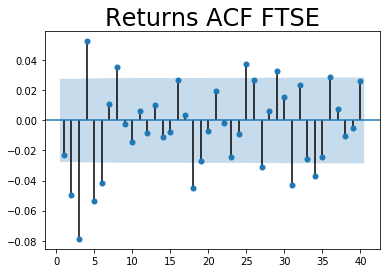

In [659]:
sgt.plot_acf(df.returns, lags=40, zero=False)
plt.title("Returns ACF FTSE", size=24)
plt.show()

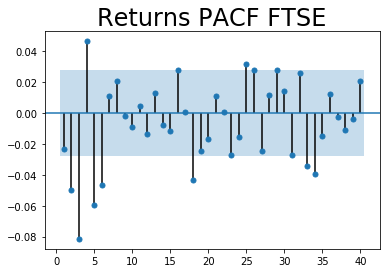

In [660]:
sgt.plot_pacf(df.returns, lags=40, zero=False, method="ols")
plt.title("Returns PACF FTSE", size=24)
plt.show()

## AR(1) for Returns

In [661]:
ret_models = []
ret_results = []

In [662]:
ret_model = ARMA(df.returns, order=(1,0))
ret_result = ret_model.fit()
ret_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(1, 0)   Log Likelihood               -7929.749
Method:                       css-mle   S.D. of innovations              1.174
Date:                Sat, 16 May 2020   AIC                          15865.497
Time:                        10:02:18   BIC                          15885.061
Sample:                    01-10-1994   HQIC                         15872.353
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0188      0.016      1.159      0.247      -0.013       0.051
ar.L1.returns    -0.0230      0.014     -1.631      0.103      -0.051       0.005
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -43.4386           +0.0000j           43.4386            0.5000
-----------------------------------------------------------------------------
"""

In [663]:
ret_models.append(ret_model)
ret_results.append(ret_result)

## Higher-lag AR for Returns

In [664]:
ret_model = ARMA(df.returns, order=(2,0))
ret_result = ret_model.fit()
ret_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(2, 0)   Log Likelihood               -7923.456
Method:                       css-mle   S.D. of innovations              1.173
Date:                Sat, 16 May 2020   AIC                          15854.911
Time:                        10:17:57   BIC                          15880.996
Sample:                    01-10-1994   HQIC                         15864.052
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0188      0.015      1.220      0.222      -0.011       0.049
ar.L1.returns    -0.0242      0.014     -1.716      0.086      -0.052       0.003
ar.L2.returns    -0.0500      0.014     -3.550      0.000      -0.078      -0.022
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.2417           -4.4635j            4.4701           -0.2586
AR.2           -0.2417           +4.4635j            4.4701            0.2586
-----------------------------------------------------------------------------
"""

In [665]:
ret_models.append(ret_model)
ret_results.append(ret_result)

In [666]:
ret_model = ARMA(df.returns, order=(3,0))
ret_result = ret_model.fit()
ret_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(3, 0)   Log Likelihood               -7906.738
Method:                       css-mle   S.D. of innovations              1.169
Date:                Sat, 16 May 2020   AIC                          15823.477
Time:                        10:18:13   BIC                          15856.083
Sample:                    01-10-1994   HQIC                         15834.902
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.330      0.184      -0.009       0.047
ar.L1.returns    -0.0283      0.014     -2.011      0.044      -0.056      -0.001
ar.L2.returns    -0.0521      0.014     -3.705      0.000      -0.080      -0.025
ar.L3.returns    -0.0815      0.014     -5.792      0.000      -0.109      -0.054
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.9233           -2.0210j            2.2219           -0.1818
AR.2            0.9233           +2.0210j            2.2219            0.1818
AR.3           -2.4855           -0.0000j            2.4855           -0.5000
-----------------------------------------------------------------------------
"""

In [667]:
ret_models.append(ret_model)
ret_results.append(ret_result)

In [668]:
ret_model = ARMA(df.returns, order=(4,0))
ret_result = ret_model.fit()
ret_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(4, 0)   Log Likelihood               -7901.330
Method:                       css-mle   S.D. of innovations              1.168
Date:                Sat, 16 May 2020   AIC                          15814.661
Time:                        10:18:20   BIC                          15853.788
Sample:                    01-10-1994   HQIC                         15828.371
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0188      0.015      1.267      0.205      -0.010       0.048
ar.L1.returns    -0.0245      0.014     -1.739      0.082      -0.052       0.003
ar.L2.returns    -0.0496      0.014     -3.531      0.000      -0.077      -0.022
ar.L3.returns    -0.0802      0.014     -5.701      0.000      -0.108      -0.053
ar.L4.returns     0.0464      0.014      3.291      0.001       0.019       0.074
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.8888           -0.0000j            1.8888           -0.5000
AR.2            0.3231           -1.9331j            1.9599           -0.2236
AR.3            0.3231           +1.9331j            1.9599            0.2236
AR.4            2.9701           -0.0000j            2.9701           -0.0000
-----------------------------------------------------------------------------
"""

In [669]:
ret_models.append(ret_model)
ret_results.append(ret_result)

In [670]:
ret_model = ARMA(df.returns, order=(5,0))
ret_result = ret_model.fit()
ret_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(5, 0)   Log Likelihood               -7892.390
Method:                       css-mle   S.D. of innovations              1.166
Date:                Sat, 16 May 2020   AIC                          15798.779
Time:                        10:18:25   BIC                          15844.428
Sample:                    01-10-1994   HQIC                         15814.775
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.348      0.178      -0.009       0.046
ar.L1.returns    -0.0217      0.014     -1.544      0.123      -0.049       0.006
ar.L2.returns    -0.0544      0.014     -3.865      0.000      -0.082      -0.027
ar.L3.returns    -0.0831      0.014     -5.914      0.000      -0.111      -0.056
ar.L4.returns     0.0449      0.014      3.190      0.001       0.017       0.073
ar.L5.returns    -0.0596      0.014     -4.232      0.000      -0.087      -0.032
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.5481           -0.0000j            1.5481           -0.5000
AR.2           -0.2860           -1.7252j            1.7487           -0.2761
AR.3           -0.2860           +1.7252j            1.7487            0.2761
AR.4            1.4366           -1.2157j            1.8819           -0.1118
AR.5            1.4366           +1.2157j            1.8819            0.1118
-----------------------------------------------------------------------------
"""

In [671]:
ret_models.append(ret_model)
ret_results.append(ret_result)

In [672]:
ret_model = ARMA(df.returns, order=(5,0))
ret_result = ret_model.fit()
ret_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(5, 0)   Log Likelihood               -7892.390
Method:                       css-mle   S.D. of innovations              1.166
Date:                Sat, 16 May 2020   AIC                          15798.779
Time:                        10:18:34   BIC                          15844.428
Sample:                    01-10-1994   HQIC                         15814.775
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.348      0.178      -0.009       0.046
ar.L1.returns    -0.0217      0.014     -1.544      0.123      -0.049       0.006
ar.L2.returns    -0.0544      0.014     -3.865      0.000      -0.082      -0.027
ar.L3.returns    -0.0831      0.014     -5.914      0.000      -0.111      -0.056
ar.L4.returns     0.0449      0.014      3.190      0.001       0.017       0.073
ar.L5.returns    -0.0596      0.014     -4.232      0.000      -0.087      -0.032
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.5481           -0.0000j            1.5481           -0.5000
AR.2           -0.2860           -1.7252j            1.7487           -0.2761
AR.3           -0.2860           +1.7252j            1.7487            0.2761
AR.4            1.4366           -1.2157j            1.8819           -0.1118
AR.5            1.4366           +1.2157j            1.8819            0.1118
-----------------------------------------------------------------------------
"""

In [673]:
ret_models.append(ret_model)
ret_results.append(ret_result)

In [674]:
ret_model = ARMA(df.returns, order=(6,0))
ret_result = ret_model.fit()
ret_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(6, 0)   Log Likelihood               -7886.945
Method:                       css-mle   S.D. of innovations              1.164
Date:                Sat, 16 May 2020   AIC                          15789.890
Time:                        10:18:38   BIC                          15842.059
Sample:                    01-10-1994   HQIC                         15808.170
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.013      1.414      0.157      -0.007       0.045
ar.L1.returns    -0.0245      0.014     -1.740      0.082      -0.052       0.003
ar.L2.returns    -0.0523      0.014     -3.716      0.000      -0.080      -0.025
ar.L3.returns    -0.0870      0.014     -6.174      0.000      -0.115      -0.059
ar.L4.returns     0.0424      0.014      3.009      0.003       0.015       0.070
ar.L5.returns    -0.0607      0.014     -4.309      0.000      -0.088      -0.033
ar.L6.returns    -0.0466      0.014     -3.302      0.001      -0.074      -0.019
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2869           -0.9022j            1.5716           -0.0973
AR.2            1.2869           +0.9022j            1.5716            0.0973
AR.3           -0.0727           -1.5282j            1.5299           -0.2576
AR.4           -0.0727           +1.5282j            1.5299            0.2576
AR.5           -1.8659           -0.4836j            1.9275           -0.4596
AR.6           -1.8659           +0.4836j            1.9275            0.4596
-----------------------------------------------------------------------------
"""

In [675]:
ret_models.append(ret_model)
ret_results.append(ret_result)

In [676]:
ret_model = ARMA(df.returns, order=(7,0))
ret_result = ret_model.fit()
ret_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(7, 0)   Log Likelihood               -7886.647
Method:                       css-mle   S.D. of innovations              1.164
Date:                Sat, 16 May 2020   AIC                          15791.294
Time:                        10:18:44   BIC                          15849.985
Sample:                    01-10-1994   HQIC                         15811.860
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.399      0.162      -0.008       0.045
ar.L1.returns    -0.0240      0.014     -1.702      0.089      -0.052       0.004
ar.L2.returns    -0.0517      0.014     -3.663      0.000      -0.079      -0.024
ar.L3.returns    -0.0874      0.014     -6.202      0.000      -0.115      -0.060
ar.L4.returns     0.0433      0.014      3.064      0.002       0.016       0.071
ar.L5.returns    -0.0601      0.014     -4.263      0.000      -0.088      -0.032
ar.L6.returns    -0.0463      0.014     -3.282      0.001      -0.074      -0.019
ar.L7.returns     0.0109      0.014      0.772      0.440      -0.017       0.039
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.6490           -0.5384j            1.7347           -0.4498
AR.2           -1.6490           +0.5384j            1.7347            0.4498
AR.3           -0.1189           -1.4954j            1.5001           -0.2626
AR.4           -0.1189           +1.4954j            1.5001            0.2626
AR.5            1.2790           -0.9786j            1.6105           -0.1039
AR.6            1.2790           +0.9786j            1.6105            0.1039
AR.7            5.2269           -0.0000j            5.2269           -0.0000
-----------------------------------------------------------------------------
"""

In [677]:
ret_models.append(ret_model)
ret_results.append(ret_result)

In [678]:
ret_model = ARMA(df.returns, order=(8,0))
ret_result = ret_model.fit()
ret_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(8, 0)   Log Likelihood               -7885.599
Method:                       css-mle   S.D. of innovations              1.164
Date:                Sat, 16 May 2020   AIC                          15791.199
Time:                        10:18:53   BIC                          15856.410
Sample:                    01-10-1994   HQIC                         15814.050
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.370      0.171      -0.008       0.046
ar.L1.returns    -0.0242      0.014     -1.718      0.086      -0.052       0.003
ar.L2.returns    -0.0507      0.014     -3.593      0.000      -0.078      -0.023
ar.L3.returns    -0.0862      0.014     -6.105      0.000      -0.114      -0.059
ar.L4.returns     0.0424      0.014      2.999      0.003       0.015       0.070
ar.L5.returns    -0.0583      0.014     -4.122      0.000      -0.086      -0.031
ar.L6.returns    -0.0452      0.014     -3.203      0.001      -0.073      -0.018
ar.L7.returns     0.0114      0.014      0.807      0.420      -0.016       0.039
ar.L8.returns     0.0204      0.014      1.448      0.148      -0.007       0.048
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1098           -1.0020j            1.4952           -0.1169
AR.2            1.1098           +1.0020j            1.4952            0.1169
AR.3            1.9402           -0.0000j            1.9402           -0.0000
AR.4           -0.0601           -1.4119j            1.4131           -0.2568
AR.5           -0.0601           +1.4119j            1.4131            0.2568
AR.6           -1.4935           -1.1306j            1.8731           -0.3969
AR.7           -1.4935           +1.1306j            1.8731            0.3969
AR.8           -1.6104           -0.0000j            1.6104           -0.5000
-----------------------------------------------------------------------------
"""

In [679]:
ret_models.append(ret_model)
ret_results.append(ret_result)

In [682]:
for ii in range(0, 7):
    print(ii, ii+1, llr_test(ret_results[ii], ret_results[ii+1]))

12.586022301697085
0 1 0.0
33.43461213785122
1 2 0.0
10.816135639892309
2 3 0.001
17.88125972224043
3 4 0.0
0.0
4 5 1.0
10.88981356027216
5 6 0.001
0.5955206372418616
6 7 0.44


In [684]:
# We will stop at model 5 (6 lags) because:
# LLR for 6 Model (7 lags) is increasing
# Coefficient for 7 lags is close to Zero
# AIC values are increasing beyond model 6

## Normalizing Prices

In [686]:
benchmark_price = df.market_value[0]

In [687]:
df["norm_price"] = df.market_value.div(benchmark_price).mul(100)

In [689]:
sts.adfuller(df.norm_price)

(-1.8928710132672344,
 0.33542220743300755,
 6,
 5013,
 {'1%': -3.431655136974821,
  '5%': -2.8621167297421373,
  '10%': -2.567076993884522},
 19553.90073102193)

In [694]:
# Test Statistics is greater than 10% critical value
# norm_price is Non-stationary

## Normalizing Returns

In [691]:
benchmark_return = df.returns[0]

In [692]:
df["norm_ret"] = df.returns.div(benchmark_return).mul(100)

In [693]:
sts.adfuller(df.norm_ret)

(-12.77026571949722,
 7.798058336038942e-24,
 32,
 4987,
 {'1%': -3.431661944885779,
  '5%': -2.8621197374408225,
  '10%': -2.5670785949998973},
 80114.49116124898)

In [690]:
# Test Statistics is less than 1% critical value
# norm_return is Stationary

## --> Normalization does not change the Stationarity

## Model Selection for Normalized Returns

In [696]:
model_norm_ret = ARMA(df.norm_ret, order=(4, 0))
result_norm_ret = model_norm_ret.fit()
result_norm_ret.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:               norm_ret   No. Observations:                 5020
Model:                     ARMA(4, 0)   Log Likelihood              -40323.325
Method:                       css-mle   S.D. of innovations            745.155
Date:                Sat, 16 May 2020   AIC                          80658.650
Time:                        10:57:34   BIC                          80697.777
Sample:                    01-10-1994   HQIC                         80672.361
                         - 04-05-2013                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -12.0492      9.493     -1.269      0.204     -30.655       6.557
ar.L1.norm_ret    -0.0245      0.014     -1.739      0.082      -0.052       0.003
ar.L2.norm_ret    -0.0496      0.014     -3.531      0.000      -0.077      -0.022
ar.L3.norm_ret    -0.0802      0.014     -5.701      0.000      -0.108      -0.053
ar.L4.norm_ret     0.0464      0.014      3.291      0.001       0.019       0.074
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.8888           -0.0000j            1.8888           -0.5000
AR.2            0.3231           -1.9331j            1.9599           -0.2236
AR.3            0.3231           +1.9331j            1.9599            0.2236
AR.4            2.9701           -0.0000j            2.9701           -0.0000
-----------------------------------------------------------------------------
"""

In [697]:
model_norm_ret = ARMA(df.returns, order=(4, 0))
result_norm_ret = model_norm_ret.fit()
result_norm_ret.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(4, 0)   Log Likelihood               -7901.330
Method:                       css-mle   S.D. of innovations              1.168
Date:                Sat, 16 May 2020   AIC                          15814.661
Time:                        10:58:31   BIC                          15853.788
Sample:                    01-10-1994   HQIC                         15828.371
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0188      0.015      1.267      0.205      -0.010       0.048
ar.L1.returns    -0.0245      0.014     -1.739      0.082      -0.052       0.003
ar.L2.returns    -0.0496      0.014     -3.531      0.000      -0.077      -0.022
ar.L3.returns    -0.0802      0.014     -5.701      0.000      -0.108      -0.053
ar.L4.returns     0.0464      0.014      3.291      0.001       0.019       0.074
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.8888           -0.0000j            1.8888           -0.5000
AR.2            0.3231           -1.9331j            1.9599           -0.2236
AR.3            0.3231           +1.9331j            1.9599            0.2236
AR.4            2.9701           -0.0000j            2.9701           -0.0000
-----------------------------------------------------------------------------
"""

In [698]:
# ONly Coefficient of Constant changes and not for other lags

## --> Normalized values has no impact on Model Selection

## Residuals (Prices and Returns)

In [730]:
len(results)

8

In [731]:
df['prices_res'] = results[6].resid

In [732]:
df.prices_res.describe()

count    5020.000000
mean        0.352554
std        63.328384
min     -1649.389004
25%       -26.851491
50%         2.368839
75%        29.816212
max       418.477333
Name: prices_res, dtype: float64

In [733]:
sts.adfuller(df.prices_res)

# Test statistics is less than 1% critical value
# Ho of Non-Stationary is Rejected
# Residual of Prices is Stationary

(-75.96949218653492,
 0.0,
 0,
 5019,
 {'1%': -3.4316535759402753,
  '5%': -2.8621160400844468,
  '10%': -2.567076626752987},
 54832.42174535918)

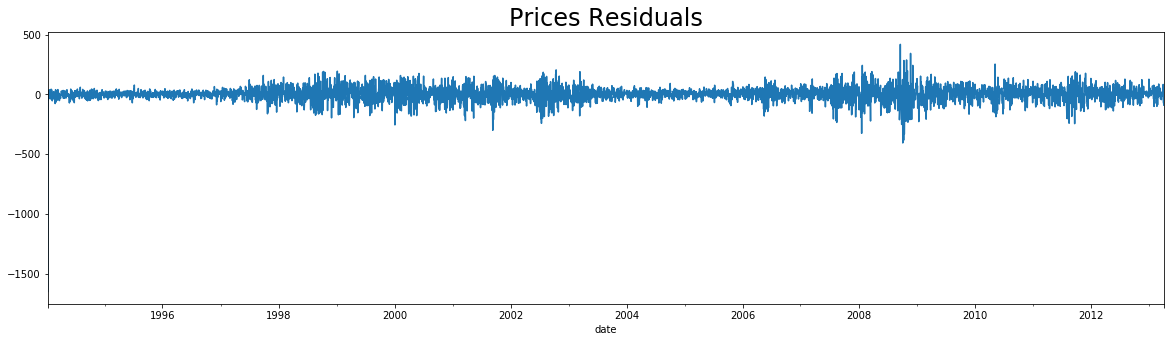

In [749]:
df.prices_res.plot(figsize=(20, 5))
plt.title("Prices Residuals", size=24)
plt.show()

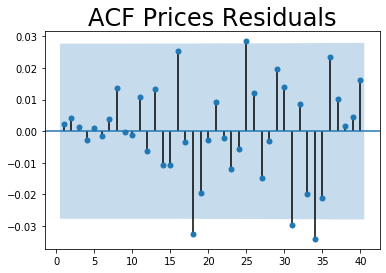

In [741]:
sgt.plot_acf(df.prices_res, lags=40, zero=False)
plt.title("ACF Prices Residuals", size=24)
plt.show()

In [729]:
len(ret_results)

9

In [705]:
df['returns_res'] = ret_results[6].resid

In [706]:
df.returns_res.describe()

count    5020.000000
mean       -0.000054
std         1.164466
min        -8.756862
25%        -0.556967
50%         0.033910
75%         0.602856
max         9.014422
Name: returns_res, dtype: float64

In [708]:
sts.adfuller(df.returns_res)

# Test statistics is less than 1% critical value
# Ho of Non-Stationary is Rejected
# Residual of Returns is Stationary

(-70.78379951416683,
 0.0,
 0,
 5019,
 {'1%': -3.4316535759402753,
  '5%': -2.8621160400844468,
  '10%': -2.567076626752987},
 15692.570834279846)

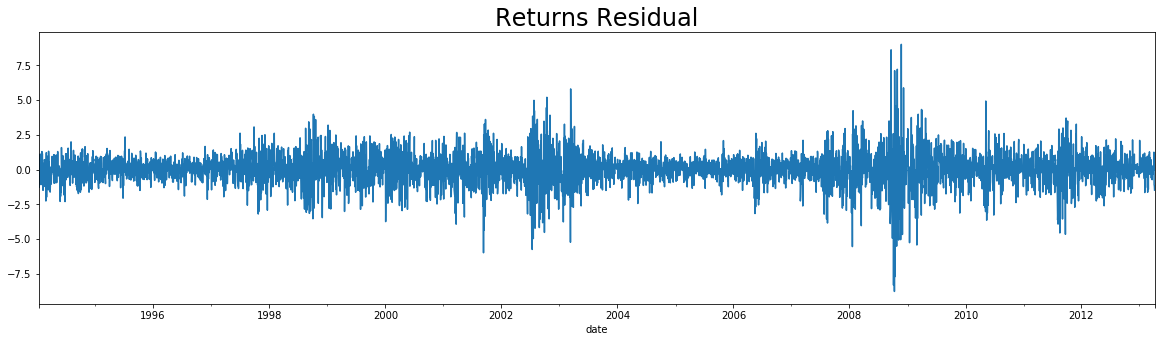

In [740]:
df.returns_res.plot(figsize=(20, 5))
plt.title("Returns Residuals", size=24)
plt.show()

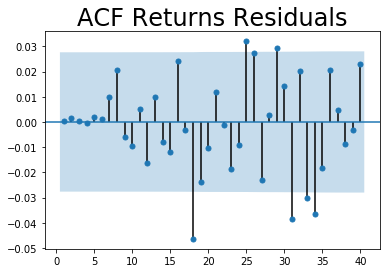

In [742]:
sgt.plot_acf(df.returns_res, lags=40, zero=False)
plt.title("ACF Returns Residuals", size=24)
plt.show()

## --> Residuals are Stationary and so AR Models can be applied